<a href="https://colab.research.google.com/github/akash-ranjan8/SENTIMENT_ANALYSIS_OF_STOCK_NEWS/blob/master/sentiment_analysis_of_stock_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis of Stock News

#IMPORTING THE LIBRARIES

In [30]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

#Parsing Finviz Article Data with BeautifulSoup

In [31]:
finviz_url='https://finviz.com/quote.ashx?t='
tickers=['AMZN','GOOG','FB']
news_tables={}
for ticker in tickers:
  url = finviz_url + ticker
  req = Request(url=url,headers={'user-agent':'my-app'})
  response = urlopen(req)
  print(response)
  html = BeautifulSoup(response,'html')
  print(html)
  news_table=html.find(id='news-table')
  news_tables[ticker]=news_table
print(news_tables)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
<html>
<head>
<title>AMZN Amazon.com, Inc. Stock Quote</title>
<meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
<meta content="Stock Screener, Charts, Quotes, Maps, News, Financial Visualizations, Research, Trading Systems" name="keywords"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="no-cache" http-equiv="pragma"/>
<meta content="no-cache" http-equiv="cache-control"/>
<meta content="-1" http-equiv="Expires"/>
<link href="//fonts.googleapis.com/css?family=Lato:400,700,900" rel="stylesheet" type="text/css"/><link href="/finviz.css?rev=138" rel="stylesheet" type="text/css"/>
<link href="/favicon_2x.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="/favicon.png" rel="icon" sizes="16x16" type="image/png"/>
<script src="/script/boxover.js?rev=210" type="text/javascript"></script>
<script src="/script/lightup.js?rev=210" type="text/javascript"></

#Manipulating Article Data with Pandas

In [32]:
amzn_data=news_tables['AMZN']
amzn_rows=amzn_data.findAll('tr')
print(amzn_rows)
for index,row in enumerate(amzn_rows):
  title=row.a.text
  timestamp=row.td.text
  print(timestamp+" "+title)

[<tr><td align="right" style="white-space:nowrap" width="130">Aug-13-20 07:13AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.barrons.com/articles/29-more-companies-that-should-consider-declaring-stock-splits-51597256602?siteid=yhoof2" target="_blank">Tesla and Apple Are Splitting Their Stocks. Here Are 29 More Companies That Could Do the Same Thing.</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Barrons.com</span></div></div></td></tr>, <tr><td align="right" width="130">06:05AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2020/08/13/2-financial-stocks-on-my-radar/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">2 Financial Stocks on My Radar</a></div><div class="news-link-right"><span style="color:#aa6dc0;font

#PARSING DATA FOR ALL THE TICKERS

In [33]:
parsed_data=[]
for ticker,news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title=row.a.text
    date_data=row.td.text.split(' ')
    if len(date_data)==1:
      time=date_data[0]
    else:
      date=date_data[0]
      time=date_data[1]
    parsed_data.append([ticker,date,time,title])
print(parsed_data)

[['AMZN', 'Aug-13-20', '07:13AM\xa0\xa0', 'Tesla and Apple Are Splitting Their Stocks. Here Are 29 More Companies That Could Do the Same Thing.'], ['AMZN', 'Aug-13-20', '06:05AM\xa0\xa0', '2 Financial Stocks on My Radar'], ['AMZN', 'Aug-13-20', '06:04AM\xa0\xa0', '3 Stay-at-Home Tech Stocks to Buy Right Now'], ['AMZN', 'Aug-13-20', '06:00AM\xa0\xa0', 'TikTok and WeChat Expose Big Techs Lack of Innovation'], ['AMZN', 'Aug-13-20', '06:00AM\xa0\xa0', 'Apple Readies Apple One Subscription Bundles to Boost Services'], ['AMZN', 'Aug-12-20', '11:45PM\xa0\xa0', 'Bob Woodwards new Trump book, Rage, due out in September'], ['AMZN', 'Aug-12-20', '09:16PM\xa0\xa0', 'PRESS DIGEST- Financial Times - Aug. 13'], ['AMZN', 'Aug-12-20', '08:55PM\xa0\xa0', 'Franklin Templeton Is in Talks to Back Sneaker Unicorn Allbirds'], ['AMZN', 'Aug-12-20', '07:25PM\xa0\xa0', 'Why AMD Stock Surged Today'], ['AMZN', 'Aug-12-20', '05:51PM\xa0\xa0', 'The S&P 500 Tried  and Failed  to Close at a Record High Again. What Co

#Applying Sentiment Analysis on Article Headlines

In [34]:
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
print(df.head())
vader=SentimentIntensityAnalyzer()
f=lambda title: vader.polarity_scores(title)['compound']
df['compound']=df['title'].apply(f)
print(df.head())

  ticker  ...                                              title
0   AMZN  ...  Tesla and Apple Are Splitting Their Stocks. He...
1   AMZN  ...                     2 Financial Stocks on My Radar
2   AMZN  ...        3 Stay-at-Home Tech Stocks to Buy Right Now
3   AMZN  ...  TikTok and WeChat Expose Big Techs Lack of Inn...
4   AMZN  ...  Apple Readies Apple One Subscription Bundles t...

[5 rows x 4 columns]
  ticker  ... compound
0   AMZN  ...   0.0000
1   AMZN  ...   0.0000
2   AMZN  ...   0.0000
3   AMZN  ...  -0.0772
4   AMZN  ...   0.4019

[5 rows x 5 columns]


#Visualization of Sentiment Analysis with MatPlotLib



ticker          AMZN        FB      GOOG
date                                    
2020-08-05       NaN -0.155733  0.050575
2020-08-06       NaN -0.069170 -0.005743
2020-08-07       NaN -0.078547 -0.057289
2020-08-08       NaN -0.094717 -0.251375
2020-08-09       NaN  0.000000 -0.180833
2020-08-10  0.185195  0.031994 -0.032493
2020-08-11  0.177545 -0.004636  0.006923
2020-08-12  0.133653 -0.141560  0.040156
2020-08-13  0.064940  0.162350 -0.027500


<Figure size 864x864 with 0 Axes>

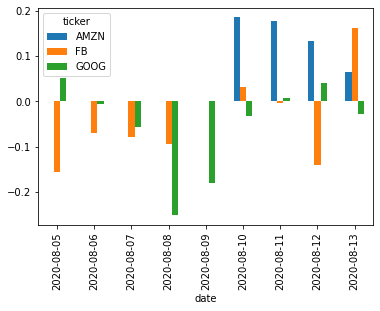

In [37]:
df['date']=pd.to_datetime(df.date).dt.date
plt.figure(figsize=(12,12))
mean_df=df.groupby(['ticker','date']).mean()
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis="columns").transpose()
print(mean_df)
mean_df.plot(kind='bar')
plt.show()